In [1]:
from pylab import *
from scipy.integrate import*
%matplotlib inline

In [2]:
def osc(y_v,t,omega2=1.):
    dy = y_v[1]
    dv = -omega2*y_v[0] 
    return array([dy,dv])

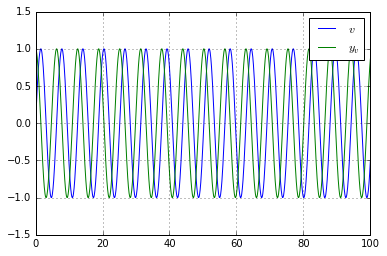

In [11]:
t = linspace(0,100,1000)
ini = array([0.,1.])
sol = odeint(osc,ini,t)
plot(t,sol[:,0],label="$ v $")
plot(t,sol[:,1],label="$y_v$")
grid(True),legend()
show()

In [4]:
def root_trayectoria(func,pto_i,ti,error=1e-5):
    while abs(pto_i[0])>error:
        tip1 = ti - (pto_i[0]/pto_i[1])
        paso = odeint(osc,pto_i,[ti,tip1])
        ti,pto_i =tip1,paso[-1]
    return ti,pto_i    
    

In [6]:
ind = 10
ti,pto_i = t[ind],sol[ind]
t_raiz,punto = root_trayectoria(osc,pto_i,ti)
print t_raiz,punto    

    

3.14159234161 [  3.78723424e-07  -9.99999825e-01]


In [14]:
num = len(t)
raices = zeros(num)
puntos = zeros((num,2))
j=0
for i in range(len(t)-1):
    if (sol[i][0]*sol[i+1][0]) < 0:
        raices[j],puntos[j] = root_trayectoria(osc,sol[i],t[i])
        j+=1
raices,puntos = raices[0:j],puntos[0:j]
print raices   
print puntos


[  3.1415928    6.28318547   9.42477936  12.56637086  15.70796354
  18.84956589  21.9911489   25.1327417   28.27433424  31.41592691
  34.55752361  37.69911225  40.84070492  43.98229759  47.12389026
  50.2654841   53.40707561  56.54866828  59.69027049  62.83185362
  65.97344641  69.11503896  72.25663163  75.39822826  78.53981697
  81.68140964  84.82300231  87.96459498  91.10618879  94.24778033
  97.389373  ]
[[  9.53149235e-17  -9.99999974e-01]
 [  1.04525289e-13   1.00000001e+00]
 [ -1.19489147e-06  -1.00000013e+00]
 [ -5.53817246e-16   1.00000016e+00]
 [  4.49811195e-12  -1.00000022e+00]
 [  9.66826789e-06   1.00000030e+00]
 [ -1.44675938e-15  -1.00000035e+00]
 [  1.36770829e-07   1.00000040e+00]
 [  2.37372513e-16  -1.00000045e+00]
 [ -1.54177494e-12   1.00000048e+00]
 [ -4.03324433e-06  -1.00000055e+00]
 [ -1.99734435e-15   1.00000059e+00]
 [  3.18382386e-12  -1.00000062e+00]
 [ -2.06054317e-15   1.00000069e+00]
 [ -1.83633490e-13  -1.00000072e+00]
 [  1.16303277e-06   1.00000078e+0

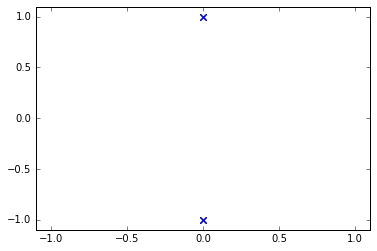

In [16]:
xlim([-1.1,1.1]),ylim([-1.1,1.1])
plot(puntos[:,0],puntos[:,1],'x')
show()